In [31]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt

### Filter conditions  
* Axis is Y
* max_8 <= 79.84
* max_9 <= 76.56


#####  74.86	93.13  (New values) 


In [19]:
alll = pd.DataFrame()

for i in os.listdir('./Processed/'):
    df = pd.read_excel('./Processed/'+i)
    df2 = df[(df.Axis == 'Y')]
    alll = alll.append(df2,ignore_index=True)
(alll['Defects Introduced'] == 'No Defect_with Seven tray').sum()

198

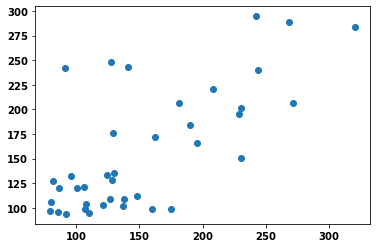

In [38]:
plt.scatter(x=all_sensor_tray_check['max_8'],y=all_sensor_tray_check['max_9'])

In [20]:
all_sensor_filt = pd.DataFrame()

for i in os.listdir('./Processed/'):
    df = pd.read_excel('./Processed/'+i)
    df2 = df[(df.Axis == 'Y') & (df.max_8 <= 74.86) & (df.max_9 <= 93.13)]
    all_sensor_filt = all_sensor_filt.append(df2,ignore_index=True)
(all_sensor_filt['Defects Introduced'] == 'No Defect_with Seven tray').sum()

125

In [24]:
all_sensor_tray_check = pd.DataFrame()

for i in os.listdir('./Processed/'):
    df = pd.read_excel('./Processed/'+i)
    df2 = df[((df.Axis == 'Y') & (df.max_8 > 74.86) & (df.max_9 > 93.13))]
    all_sensor_tray_check = all_sensor_tray_check.append(df2,ignore_index=True)
(all_sensor_tray_check['Defects Introduced'] == 'No Defect_with Seven tray').sum()

8

### map low,med,high values to 1,2,3 respectively

In [3]:
# first get the columns which have low med and high values

Priority_cols = []
prio = ['low','med','high']

for i in all_sensor_filt.columns:
    if all_sensor_filt[i].dtype == 'object':
        
        lst = all_sensor_filt[i].str.lower().value_counts().index
        if lst.any() in prio:
            Priority_cols.append(i)

In [4]:
# here we will map values med, low and high values to 
priority_change = {'low':1, 'med':2, 'high':3}
for i in Priority_cols:
        all_sensor_filt[i] = all_sensor_filt[i].str.lower().map(priority_change)

### check individual col values before doing fillna

In [ ]:


for i in all_sensor_filt.columns:
    #print(all_sensor_filt[i].dtype)
    if all_sensor_filt[i].dtype == 'object':
        print('Column name :',i)
        print(all_sensor_filt[i].str.lower().value_counts())
        print()

In [5]:
# fill all nan values to zeros
all_sensor_filt = all_sensor_filt.fillna(0)

In [ ]:
# export data to excel just to check format

#all_sensor_filt.to_excel('processed-test.xlsx')

#all_sensor_filt[all_sensor_filt['Defects Introduced'] == 'No Defect_with Seven tray']

#all_sensor_filt[all_sensor_filt['Defects Introduced'] == 'No Defect_with Seven tray'][['max_8','max_9']].to_excel('max_89.xlsx')

In [6]:
final_data = all_sensor_filt[['Asset_Id', 'Axis', 'Belt-Belt', 'Belts', 'Data_pull_time',
       'Defects Introduced', 'Drive Station', 'DriveShaft-Bearing',
       'DriveShaft-Cardan shaft', 'DriveShaft-Damper Bush\'',
       'DriveShaft-Drive Motor', 'DriveShaft-Drive Shaft', 'Mac_Id', 'Remarks',
       'Roller_Wheels-Inner Trunk Roller', 'Roller_Wheels-RW Wheels',
       'Roller_Wheels-Upper Trunk Roller', 'Rollers/Wheels', 'Sensor_Loc',
       'Slave shafts', 'SlaveShaft- Shaft', 'SlaveShaft-Bearing',
       'SlaveShaft-Remarks2', 'SlaveShaft-Wheels', 'Tension Station',
       'TensionUnit-RW-Bearing', 'TensionUnit-Tension Shaft / Unit',
       'TensionUnit-Tension Spring', 'Test Condition']]

In [9]:
final_data.shape


test_Data = all_sensor_tray_check[all_sensor_tray_check.Sensor_Loc == 'MET_EDT']
test_Data[test_Data['Defects Introduced'] == 'No Defect_with Seven tray'][['max_8','max_9']].sort_values(by='max_8')

,max_8,max_9
19,86.653466,120.289360
29,92.596818,93.830538
22,106.216672,121.217753
28,107.196830,98.974654
20,128.169821,127.869552
21,137.743022,109.074766
17,208.502227,220.618861


### Standerize - we will use minmaxscaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
scaled_data = mms.fit_transform(all_sensor_filt.loc[:,'crest':'variance'])

In [ ]:
scaled_df = pd.DataFrame(scaled_data,columns=['crest',
       'freqAmpliKurt', 'freqAmpliMax', 'freqAmpliMean', 'freqAmpliVar',
       'freqAmpliskw', 'kurt', 'max_1', 'max_10', 'max_11', 'max_12', 'max_13',
       'max_14', 'max_15', 'max_16', 'max_2', 'max_3', 'max_4', 'max_5',
       'max_6', 'max_7', 'max_8', 'max_9', 'mean', 'mean_1', 'mean_10',
       'mean_11', 'mean_12', 'mean_13', 'mean_14', 'mean_15', 'mean_16',
       'mean_2', 'mean_3', 'mean_4', 'mean_5', 'mean_6', 'mean_7', 'mean_8',
       'mean_9', 'peak-peak', 'rms', 'skewness', 'var_1', 'var_10', 'var_11',
       'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'variance'])

In [ ]:
merged_data = pd.concat([final_data,scaled_df],axis=1)

###### considering metering MET_EDT positions for now

In [ ]:
Met_Data = merged_data[merged_data.Sensor_Loc == 'MET_EDT']
#Met_Data.head()

In [ ]:
(Met_Data['Defects Introduced'] == 'No Defect_with Seven tray').sum()

In [ ]:
Met_Data[Met_Data['Defects Introduced'] == 'No Defect_with Seven tray'][['max_8','max_9']]

In [ ]:
tray_check = pd.DataFrame()

for i in os.listdir('./Processed/'):
    df = pd.read_excel('./Processed/'+i)
    df2 = df[(df.Axis == 'Y')  & (df.max_8 <= 79.84) & (df.max_9 <= 76.56) & (df.Sensor_Loc == 'MET_EDT')]
    tray_check = tray_check.append(df2,ignore_index=True)

In [ ]:
tray_check[tray_check['Defects Introduced'] == 'No Defect_with Seven tray'][['Asset_Id','Mac_Id','max_8','max_9']].to_excel('max_89_new.xlsx')

In [ ]:
tray_check.shape

In [ ]:
for i in Priority_cols:
    print('Column name :',i)
    print(all_sensor_filt[i].value_counts())
    print()

In [ ]:
for i in all_sensor_filt.columns[6:]:
    if all_sensor_filt[i].dtype == 'object':
        print('Column name :',i)
        all_sensor_filt[i] = all_sensor_filt[i].str.lower().map(priority_change)
        

In [ ]:
data = pd.read_excel('./Processed/299cfe16_Processed.xlsx')

In [ ]:
all_sensor_filt['Drive Station'].value_counts()

In [ ]:
all_sensor_filt.loc[:3,['Mac_Id', 'Remarks',
       'Roller_Wheels-Inner Trunk Roller', 'Roller_Wheels-RW Wheels']]

In [ ]:
all_sensor_filt.columns

In [ ]:
all_sensor_filt.Mac_Id.value_counts()

In [ ]:
for i in all_sensor_filt.columns:
    if all_sensor_filt[i].dtype == 'object':
        print('Column name :',i)
        print(all_sensor_filt[i].str.lower().value_counts().index)
        print()

In [ ]:
final_data